<a href="https://colab.research.google.com/github/williambrunos/Introduction-To-ML/blob/main/Class_3/K-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means Clustering

The K-means algorithm is used for calculating the centroids for each class on the feature space. It is build using iteractively steps:

- Pick up random points for being the centróids;
- Calculate the distance between each observation and the dentróids, choose the class represented by the nearest centroid of the space;
- Pick up the mean for each centroid and repeat the process until the centroid barely changes;
- Calculate the variance of the data among each centroid;
- Continue choosing random points for the centroid until the algorithm gets the lowest deviation among the data represented by the centroids;

So...the k cluster choice must be one that produces the lowest deviation, right? Eh...no! The k that must be choice is that one that, as far the k value goes from that one, the value of the deviation barely decreases. The value of k that does that is called the **elbow k**, identified on the **elbow plot**.

**Obs:** Remember, the main goal of this kind of algorithm is to cluster and discover patterns on our data.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://leadfortaleza.com.br/ead2pcd/conteudo/tmp/myopenolat_1_102577677377129//Oficina/download/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


The pandas method above tell us that the data set has 200 observations, all of them non-null (not NaN) on all the columns.

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
columns = df.columns
columns_as_strings = ['_'.join(column_as_string.split()) for column_as_string in columns]

In [13]:
columns_as_strings

['CustomerID', 'Gender', 'Age', 'Annual_Income_(k$)', 'Spending_Score_(1-100)']

In [14]:
df.columns = columns_as_strings

In [15]:
df.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


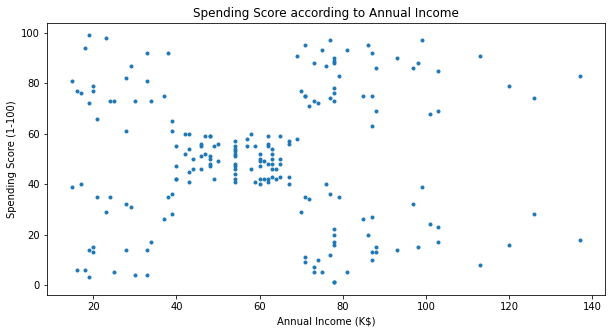

In [22]:
plt.figure(figsize=(10, 5))
plt.title('Spending Score according to Annual Income')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.scatter(df['Annual_Income_(k$)'], df['Spending_Score_(1-100)'], marker='.')

According to the scatter plot above, we can see that are 5 different groups of data that has a certain spending score according to its annual income.

## Clustering

We are going to use K-means algorithm to find clusters on the data.

In [21]:
X = df[['Annual_Income_(k$)', 'Spending_Score_(1-100)']]
X

,Annual_Income_(k$),Spending_Score_(1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [25]:
from sklearn.cluster import KMeans

In [27]:
KMeans?

In [28]:
model = KMeans(n_clusters=5, init='k-means++')

In [29]:
y_classes = model.fit_predict(X)
y_classes

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

Note that the **y_classes** array returned by the predict function from the K Means model represents the class predicted for each of our X data.

We can see what data on the original dataset is on a certain class 'n'. For this, we just use a print and call the iloc function to take elements form the data according to the index of it and the condiional that the elments on the data are classified as 'n' in the **y_classes** array .

In [32]:
print(X.iloc[y_classes == 0])

     Annual_Income_(k$)  Spending_Score_(1-100)
43                   39                      61
46                   40                      55
47                   40                      47
48                   40                      42
49                   40                      42
..                  ...                     ...
121                  67                      40
122                  69                      58
126                  71                      35
132                  72                      34
142                  76                      40

[81 rows x 2 columns]


In [34]:
model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 5,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

## Plotting the Clustering

In [35]:
plt.scatter?

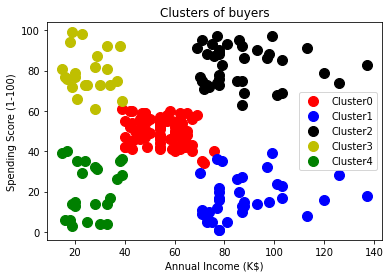

In [45]:
k_groups = 5
colors = ['r', 'b', 'k', 'y', 'g']
for k in range(k_groups):
  cluster_points = X[y_classes == k]
  plt.scatter(cluster_points['Annual_Income_(k$)'], cluster_points['Spending_Score_(1-100)'], c=colors[k], s=100, label=f'Cluster{k}')

plt.title('Clusters of buyers')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()